In [1]:
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2024-01-22 02:02:05.345395: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 02:02:05.460215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 02:02:05.460311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 02:02:05.460757: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 02:02:05.519992: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12254611028420813936
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5607784448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16257319679870025394
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-01-22 02:02:07.276048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 02:02:07.299788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 02:02:07.299815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 02:02:08.241684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 02:02:08.241741: I tensorflow/compile

In [ ]:
os.chdir("/mnt/")

In [195]:
rm -rf Data

In [196]:
!git clone https://github.com/Annaantonin/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 77 (delta 10), reused 4 (delta 4), pack-reused 55
Receiving objects: 100% (77/77), 3.55 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [197]:
import Data as data

In [ ]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

In [17]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 'output_ukF.mat',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [3]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat

import matplotlib.pyplot as plt

In [4]:
  data = sio.loadmat("Data/3_Dof_NoisySin_2000.mat")

In [123]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
# % SDOF System Parameters
# m = 5.0;       % Mass (kg)
# k = 10.0;     % Stiffness (N/m)
# c = 0.22;      % Damping coefficient (Ns/m)
# dt=0.001

def load_data(noise):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/3_Dof_NoisySin_2000.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    t_train, x_tt_train =data["t"],data["a"]
    
    x1_tt_train, x2_tt_train, x3_tt_train= data["a1"],data["a2"], data["a3"]
    print(x1_tt_train.shape)
    x_train, f_train = data["u"], data["F"]
    n=200
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x1_tt_train[0:n], x2_tt_train[0:n], x3_tt_train[0:n], t_train[0:n], x_train[0:n], f_train[0:n]

#m=1
# [0][..., 0:1]     

# def pde_xtt1(t,x1):
#     x1_t = tf.gradients(x1, t)[0] [..., 0:1] 
#     x1_tt = tf.gradients(x1_t, t)[0] [..., 0:1] 
#     return x1_tt
# def pde3_init(init,x3):
#     return x3[0]



def pde3_init(t,x3): # make them alll !!!!! for all dof, velocity +displcements
    return x3[0]

def pde_x3(t,x3):
    return x3
    
def pde_x2(t,x2):
    return x2
    
def pde_xtt2(t,x2):
    x2_t = tf.gradients(x2, t)[0]                                                                                                                                                                                                            
    x2_tt = tf.gradients(x2_t, t)[0] 
    # print('x2',x2_tt.shape)
    return x2_tt

def pde_xtt3(t,x3):
    x3_t = tf.gradients(x3, t)[0][..., 0:1]                                                                                                                                                                                                  
    x3_tt = tf.gradients(x3_t, t)[0][..., 0:1] 
    # print('x3',x3_tt.shape)
    return x3_tt

def pde_force1(t, x1, x2, log_k1, log_k2): # f3
  
    x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]            
    x1_tt=-(((100*tf.exp(log_k1)+100*tf.exp(log_k2))*x1-100*tf.exp(log_k2)*x2)+(1.5*x1_t-1*x2_t))
    # print('x1tt', x1_tt.shape)
    
    return x1_tt

def pde_force3(t, x2,  x3, f3, log_k3): # f3

    # x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]            
    x3_t = tf.gradients(x3, t)[0][..., 0:1]       
 
    x3_tt=f3-(-100*tf.exp(log_k3)*x2+100*tf.exp(log_k3)*x3)-(-1.5*x2_t+1.5*x3_t)
      
    return x3_tt
    
def pde_force2(t, x1, x2, x3, log_k2, log_k3): # f3
    
    x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]      
    x3_t = tf.gradients(x3, t)[0][..., 0:1]       
    x2_tt=-((-100*tf.exp(log_k2)*x1+(100*tf.exp(log_k2)+100*tf.exp(log_k3))*x2-100*tf.exp(log_k3)*x3)+(-1*x1_t+2.5*x2_t-1.5*x3_t))
    
    return x2_tt


@neuq.utils.timer
def Trainable( x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers, ):
    
    # build processes
    # process_f1 = neuq.process.Process(
    #      surrogate=neuq.surrogates.FNN(layers=layers),
    #     # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
    #     posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    # )
    # process_f2 = neuq.process.Process(
    #      surrogate=neuq.surrogates.FNN(layers=layers),
    #     # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
    #     posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    # )

    process_f3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    )

    process_x1 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# predicted displacement
    )

    process_x2 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# predicted displacement
    )
    
    process_x3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.fnn.Trainable(layers=layers, regularizer=tf.keras.regularizers.l2(1e-5)),# predicted displacement
    )
   
    process_log_k1 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=2),
    )
    process_log_k2 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=2.5),
    )
    process_log_k3 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=3),
    )
    
    method = neuq.inferences.DEns(
        num_samples=1, num_iterations=20000, optimizer=tf.train.AdamOptimizer(1e-2),
    )

    # build losses
    # loss_x1 = neuq.likelihoods.MSE(
    #     inputs=t_train,
    #     targets=x_tt_train[:,0], 
    #     processes=[process_x1],
    #     pde=pde_xtt1, # dotdot _X
    #     multiplier=1.0,
    # )

    loss3_init = neuq.likelihoods.MSE(
        inputs=np.zeros_like(t_train),
        targets=0, # minimizing the loss to be close to zero
         # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x3], # tf train
        pde=pde3_init,
        multiplier=1,
    )   
   

    loss_x2 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_train[:,1], 
        processes=[process_x2],
        pde=pde_x2, # dotdot _X
        multiplier=1,
    )
    
    loss_x3 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_train[:,2], 
        processes=[process_x3],
        pde=pde_x3, # dotdot _X
        multiplier=1,
    )
    loss_x3tt = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x3_tt_train, 
        processes=[process_x3],
        pde=pde_xtt3, # dotdot _X
        multiplier=1,
    )
    loss_x2tt = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x2_tt_train, 
        processes=[process_x2],
        pde=pde_xtt2, # dotdot _X
        multiplier=1,
    )
    loss_force2=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x2_tt_train,
        processes=[process_x1, process_x2, process_x3, process_log_k2, process_log_k3], # tf train
        pde=pde_force2,
        multiplier=1,
    )
    
    loss_force3=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x3_tt_train,
        # targets=np.concatenate([x3_tt_train,x2_tt_train,np.zeros_like(t_train)],0),
        # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
        processes=[process_x2, process_x3,  process_f3,  process_log_k3], # tf train
        pde=pde_force3,
        multiplier=1,
    )
    loss_force1=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x1_tt_train,
        processes=[process_x1, process_x2,  process_log_k1, process_log_k2], # tf train
        pde=pde_force1,
        multiplier=1,
    )
    
    # build model
    model = neuq.models.Model(
        processes=[process_x1, process_x2, process_x3,  process_f3, process_log_k1,  process_log_k2,  process_log_k3],
        likelihoods=[loss_x3, loss_x2, loss_x3tt, loss_x2tt,  loss_force3, loss_force2, loss_force1, loss3_init],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()
    processes=[process_x1, process_x2, process_x3,  process_f3, process_log_k1, process_log_k2,  process_log_k3]
    return processes, samples, model


if __name__ == "__main__":
    
    noise = 0.01

    x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train = load_data(noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1,30,30,1]
   
    processes, samples, model = Trainable(x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers,   )
    # (x1_pred, x2_pred, x3_pred, f3_pred, logk2_pred, logk3_pred) = model.predict(t_train, samples, processes, pde_fn=None)
  

(2000, 1)


2024-01-22 05:23:40.718803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:23:40.718877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:23:40.718886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:23:40.719323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:23:40.719358: I tensorflow/core/co

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

Generating 0th sample by deep ensemble...


2024-01-22 05:23:42.500622: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_397/Assign' id:34101 op device:{requested: '', assigned: ''} def:{{{node Variable_397/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_397, Const_787)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  923001.06
Iteration:  1000 , loss:  3.6331425
Iteration:  2000 , loss:  3.4195113
Iteration:  3000 , loss:  3.302321
Iteration:  4000 , loss:  3.2997563
Iteration:  5000 , loss:  3.286174
Iteration:  6000 , loss:  3.3157709
Iteration:  7000 , loss:  3.2897947
Iteration:  8000 , loss:  3.281349
Iteration:  9000 , loss:  3.2779899
Iteration:  10000 , loss:  3.2771058
Iteration:  11000 , loss:  10.176519
Iteration:  12000 , loss:  3.2815478
Iteration:  13000 , loss:  3.2740684
Iteration:  14000 , loss:  3.273031


KeyboardInterrupt: 

In [ ]:
 # x1_pred, x2_pred, x3_pred,f1_pred, f2_pred, f3_pred = model.predict(t_train, samples, processes, pde_fn=None)
(xtt3_pred,)= model.predict(t_train, samples, processes, pde_fn=pde_force2)

In [ ]:
plt.plot(t_train,xtt3_pred.flatten(), 'b',label='Fitted Acceleration 3rd DoF')
plt.plot(t_train, x3_tt_train, 'r',label='Target Acceleration 3rd DoF')
plt.legend()

In [117]:
# (x3_pred,) = model.predict(t_train, samples, processes, pde_fn=None)
(x1_pred, x2_pred, x3_pred, f3_pred, logk1_pred, logk2_pred, logk3_pred) = model.predict(t_train, samples, processes, pde_fn=None)

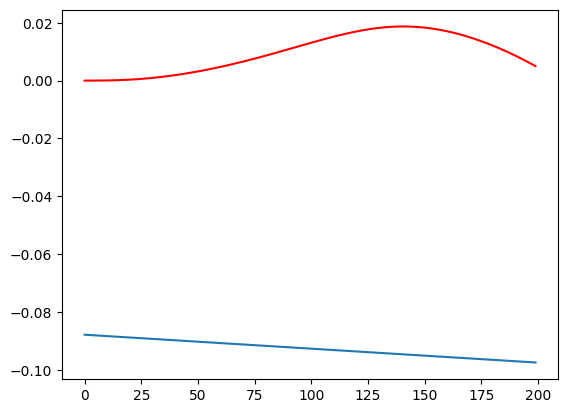

In [118]:
plt.plot(x3_pred.flatten())
plt.plot(x_train[:,2],'r',label='Actual displacement')
# print(x3_pred.shape)

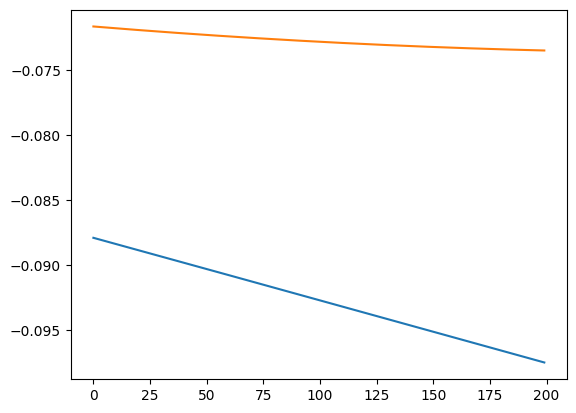

In [119]:
plt.plot(x3_pred.flatten())
plt.plot(x2_pred.flatten())

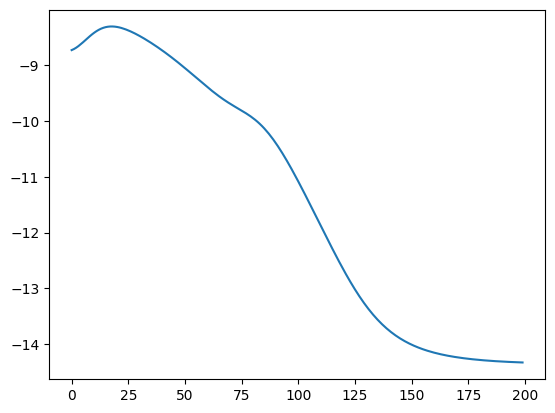

In [120]:
# x=np.array(x3_pred)
# plt.plot(x[0, :, 0])
# plt.plot(x3_train)
plt.plot(f3_pred.flatten())


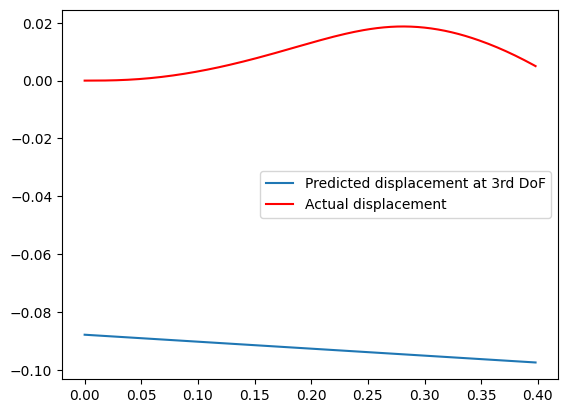

In [121]:
plt.plot(t_train,np.mean(x3_pred,axis=(0, 2)),label='Predicted displacement at 3rd DoF')
# plt.plot(t_train,np.mean(x2_pred,axis=(0, 2)),label='Predicted displacement at 2nd DoF')
# plt.plot(t_train,np.mean(x1_pred,axis=(0, 2)),label='Predicted displacement at 1nd DoF')
plt.plot(t_train,x_train[:,2],'r',label='Actual displacement')
plt.legend()

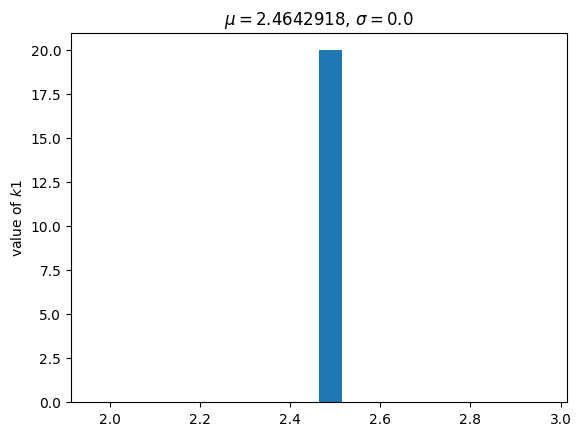

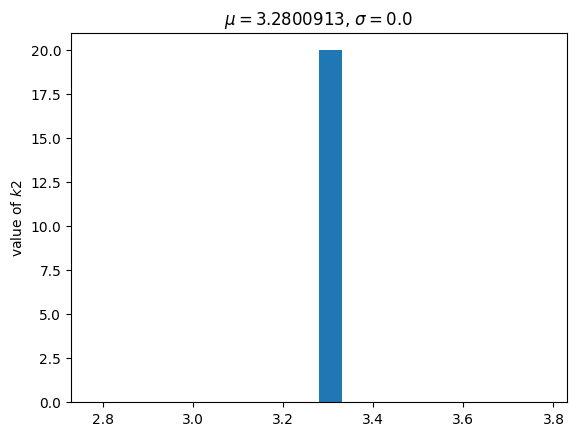

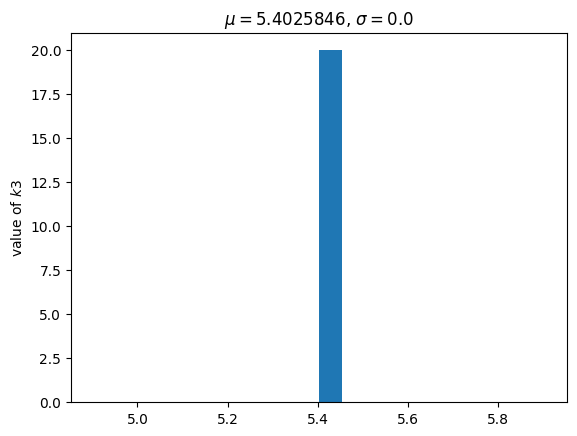

In [122]:
# plt.plot(x1_tt_train)
neuq.utils.hist(np.exp(logk1_pred).flatten(), name="value of $k1$")
neuq.utils.hist(np.exp(logk2_pred).flatten(), name="value of $k2$")
neuq.utils.hist(np.exp(logk3_pred).flatten(), name="value of $k3$")

In [14]:
len(samples)


19

In [15]:
# targets=x_tt_train.T.flatten()
targets=np.reshape(x_tt_train.T, [-1])
print(x_tt_train.shape) 
plt.plot(targets)

NameError: name 'x_tt_train' is not defined

In [16]:
# plt.plot(x1_pred)

(x_tt_pred, ) = model.predict(t_train, samples, processes, pde_fn=pde_fn)

NameError: name 'pde_fn' is not defined

In [17]:
len(processes)

4

In [ ]:
plt.plot(x_tt_train[:,2])

In [ ]:
plt.plot(t_train,f_train[:,2],'r',label='Actual force')

In [ ]:
plt.plot(t_train,np.mean(f3_pred,axis=(0, 2)),label='Predicted force')
plt.plot(t_train,f_train[:,2],'r',label='Actual force')
plt.legend()

In [ ]:
print(x1_pred.shape)
# plt.plot(t_train, x3_pred.flatten(),label='Predicted displacement')

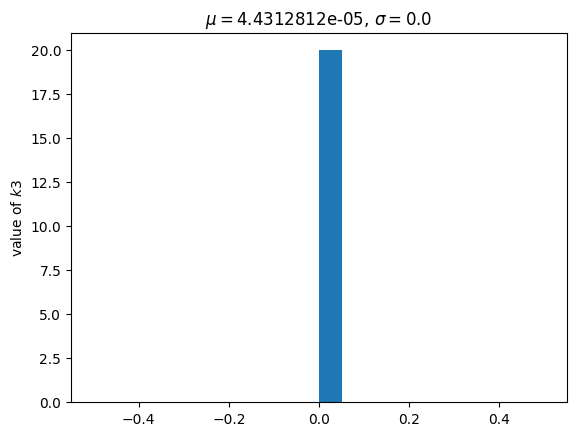

In [28]:
# neuq.utils.hist(np.exp(logk1_pred).flatten(), name="value of $k1$")
# neuq.utils.hist(np.exp(logk2_pred).flatten(), name="value of $k2$")
neuq.utils.hist(np.exp(logk3_pred).flatten(), name="value of $k3$")


In [ ]:
[a.shape for a in samples]

In [ ]:
unc_f=np.std(f_pred,axis=0)
plt.plot(unc_f)
plt.figure()
unc_x=np.std(x_pred,axis=0)
plt.plot(unc_x)

In [ ]:
Csamp=samples[12]    
Ksamp=samples[13]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 

In [ ]:
# plt.figure
# plt.plot(aa[:,0,0],'r')

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [ ]:
data_to_save = {
   "x_pred":x_pred, "f_pred":f_pred, "c":samples[12].flatten(),"k":samples[13].flatten()
}
file_name = 'output_ukF.mat'
sio.savemat(file_name, data_to_save)